## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A pictogram of a blood bag with blood donation written in it"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

Objectives of this analysis: 

1. What percentage of all licensed sets ever released were Star Wars themed? 
Answer saved in variable the_force

2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)? 
Answer saved in variable new_era in form of an integer 

In [79]:
#download necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [80]:
#load data
sets = pd.read_csv('datasets/lego_sets.csv')
parent = pd.read_csv('datasets/parent_themes.csv')

In [81]:
sets.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [82]:
parent.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


# 1) Cleaning Data

In [83]:
#find number of nulls in sets 
sets.isna().sum()

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

In [84]:
#drop rows with missing value in set_num column, which is critical 
clean_sets = sets.dropna(axis=0, subset=['set_num'])
clean_sets.isnull().sum()

set_num            0
name               0
year               0
num_parts       4998
theme_name         0
parent_theme       0
dtype: int64

In [85]:
#get a list of licensed sets by filtering 
clean_parent = parent[parent.is_licensed == True]
clean_parent

,id,name,is_licensed
7,158,Star Wars,True
12,246,Harry Potter,True
16,263,Pirates of the Caribbean,True
17,264,Indiana Jones,True
18,269,Cars,True
19,270,Ben 10,True
20,271,Prince of Persia,True
21,272,SpongeBob SquarePants,True
23,275,Toy Story,True
33,317,Avatar,True


# 2) Joining Data

In [86]:
#first way: use isin 
filter = clean_sets[clean_sets.parent_theme.isin(clean_parent.name)]

In [87]:
#get number of Star Wars themed sets 
filter.parent_theme.value_counts()

Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Disney Princess                      29
Cars                                 27
Teenage Mutant Ninja Turtles         21
Indiana Jones                        19
Pirates of the Caribbean             17
Toy Story                            15
SpongeBob SquarePants                14
The Lone Ranger                       8
Jurassic World                        7
Prince of Persia                      6
Angry Birds                           6
Scooby-Doo                            6
Ben 10                                6
Disney's Mickey Mouse                 6
Avatar                                2
Disney                                1
Ghostbusters                          1
Name: parent_theme, dtype: int64

In [88]:
#second way: join data sets 
data = pd.merge(clean_sets, clean_parent, left_on = 'parent_theme', right_on = 'name')
data.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,Star Wars,True
1,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
2,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,Star Wars,True
3,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
4,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True


In [89]:
#get number of Star Wars themed sets
data.parent_theme.value_counts()

Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Disney Princess                      29
Cars                                 27
Teenage Mutant Ninja Turtles         21
Indiana Jones                        19
Pirates of the Caribbean             17
Toy Story                            15
SpongeBob SquarePants                14
The Lone Ranger                       8
Jurassic World                        7
Prince of Persia                      6
Angry Birds                           6
Scooby-Doo                            6
Ben 10                                6
Disney's Mickey Mouse                 6
Avatar                                2
Disney                                1
Ghostbusters                          1
Name: parent_theme, dtype: int64

In [90]:
#find the answer to Question 1 by dividing number of star wars sets by total number of sets
the_force = int(609/ len(data) * 100)
the_force

51

# Pivoting and Visualizing Data

In [92]:
#pivot data to suit the request of Question 2
table = data.pivot_table(index = 'year', columns = 'parent_theme', values='set_num', aggfunc='count', fill_value=0)

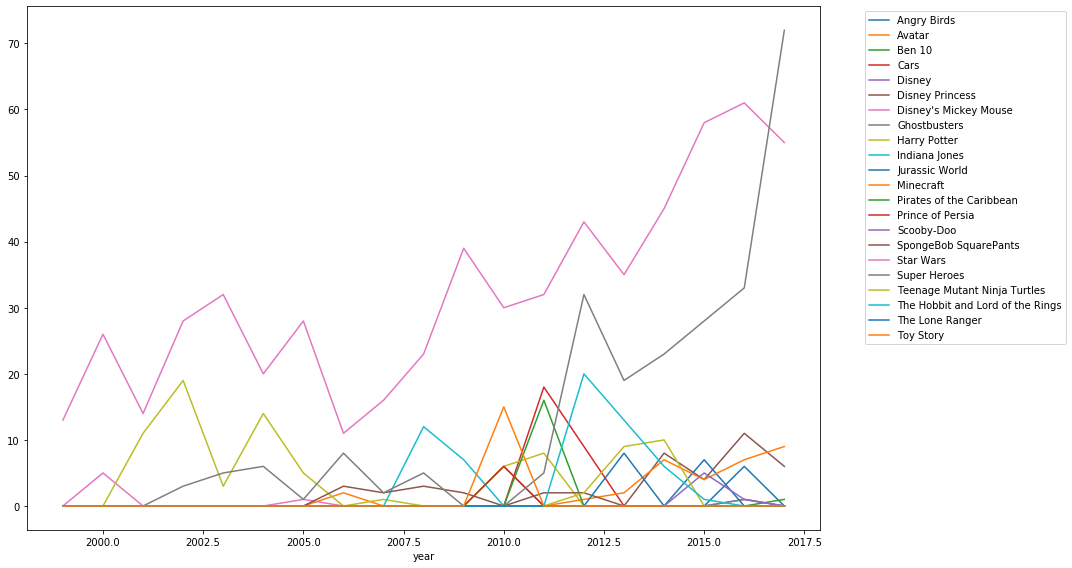

In [93]:
#plot data
table.plot(figsize=[15,8])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [94]:
#get the answer for Question 2 - from the graph, Star Wars has been the top except in the last year
new_era = 2017